In [1]:
import numpy as np
import cv2
import cv2.aruco as aruco
import pathlib
import glob
import matplotlib.pyplot as plt


In [2]:

def calibrate_aruco(dirpath, image_format):
    aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_100)
    parameters =  aruco.DetectorParameters_create()
    board = aruco.GridBoard_create(5, 7, 3, 0.5, aruco_dict)
    #corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    counter, corners_list, id_list = [], [], []
    img_dir = pathlib.Path(dirpath)
    print(img_dir)
    first = 0
    # Find the ArUco markers inside each image
    for img in img_dir.glob(f'*.jpg'):
        print("hello")
        image = cv2.imread(str(img))
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        corners, ids, rejected = aruco.detectMarkers(
            img_gray,
            aruco_dict,
            parameters=parameters
        )
        if first == 0:
            corners_list = corners
            id_list = ids
        else:
            corners_list = np.vstack((corners_list, corners))
            id_list = np.vstack((id_list,ids))
        first = first + 1
        counter.append(len(ids))
    counter = np.array(counter)
    # Actual calibration
    ret, mtx, dist, rvecs, tvecs = aruco.calibrateCameraAruco(
        corners_list,
        id_list,
        counter,
        board,
        img_gray.shape,
        None,
        None
    )
    return [ret, mtx, dist, rvecs, tvecs]


IMAGES_DIR = "/home/akanksha/Downloads/HW4"
IMAGES_FORMAT = ".jpg"
# Calibrate
ret, mtx, dist, rvecs, tvecs = calibrate_aruco(
    IMAGES_DIR,
    IMAGES_FORMAT
)
print(mtx)
print(dist)
print(tvecs)



/home/akanksha/Downloads/HW4
hello
hello
hello
[[3.23554864e+03 0.00000000e+00 1.63125310e+03]
 [0.00000000e+00 3.31059910e+03 1.64759385e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 0.18456201 -0.4801763  -0.08503202  0.0228759   3.41780057]]
(array([[-4.70638264],
       [20.8961833 ],
       [ 3.31707321]]), array([[-8.41899304],
       [17.54915201],
       [-5.54178563]]), array([[-6.77752027],
       [22.05500164],
       [ 4.29354948]]))


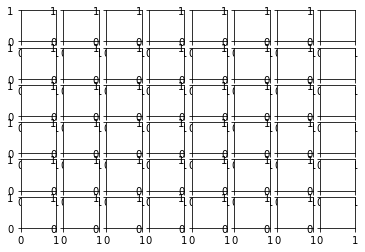

In [3]:
imagesFolder = "/home/akanksha/Downloads/HW4"

aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 8
ny = 6
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i-1, 700)
#     plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
#     ax.axis("off")

# plt.savefig(imagesFolder + "/markers.png")
# plt.show()

#plt.close()


In [4]:
import yaml
import matplotlib.pyplot as plt
frame = cv2.imread("/home/akanksha/Downloads/HW4/aka1.jpg")

# frame = "/home/akanksha/Downloads/HW1/aka1.jpg"
        # operations on the frame come here
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Change grayscale
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)  # Use 5x5 dictionary to find markers
parameters = cv2.aruco.DetectorParameters_create()  # Marker detection parameters
# lists of ids and the corners beloning to each id
corners, ids, rejected_img_points = cv2.aruco.detectMarkers(gray, aruco_dict,
                                                                parameters=parameters,
                                                                cameraMatrix=mtx,
                                                                distCoeff=dist)
if np.all(ids is not None):  # If there are markers found by detector
            for i in range(0, len(ids)):  # Iterate in markers
                # Estimate pose of each marker and return the values rvec and tvec---different from camera coefficients
                rvecs, tvecs, markerPoints = aruco.estimatePoseSingleMarkers(corners[i], 0.02, mtx,
                                                                           dist)
                (rvecs - tvecs).any()  # get rid of that nasty numpy value array error
aruco.drawDetectedMarkers(frame, corners)  # Draw A square around the markers
aruco.drawAxis(frame, mtx, dist, rvecs, tvecs, 0.01)  # Draw Axis
# Display the resulting frame
# cv2.imwrite("/home/akanksha/Downloads/HW4/ros1.jpg", frame)
# plt.figure(figsize=(40, 40))

# plt.imshow(frame)
# cv2.imshow('frame', frame)
#         # Wait 3 milisecoonds for an interaction. Check the key and do the corresponding job.
# cv2.waitKey(0)
#     # When everything done, release the capture

# cv2.destroyAllWindows()

array([[[120, 168, 192],
        [111, 159, 183],
        [117, 165, 189],
        ...,
        [107, 153, 177],
        [104, 150, 174],
        [105, 151, 175]],

       [[113, 161, 185],
        [111, 159, 183],
        [125, 173, 197],
        ...,
        [106, 152, 176],
        [103, 149, 173],
        [104, 150, 174]],

       [[120, 168, 192],
        [125, 173, 197],
        [125, 173, 197],
        ...,
        [107, 153, 177],
        [105, 151, 175],
        [108, 154, 178]],

       ...,

       [[ 23,  27,  28],
        [ 25,  29,  30],
        [ 26,  30,  31],
        ...,
        [ 40,  42,  42],
        [ 45,  47,  47],
        [ 49,  51,  51]],

       [[ 14,  18,  19],
        [ 11,  15,  16],
        [ 12,  16,  17],
        ...,
        [ 42,  44,  44],
        [ 43,  45,  45],
        [ 45,  47,  47]],

       [[  9,  13,  14],
        [ 13,  17,  18],
        [ 18,  22,  23],
        ...,
        [ 43,  45,  45],
        [ 42,  44,  44],
        [ 45,  47,  47]]

In [5]:
def draw(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    print(imgpts)
    # draw ground floor in green
    img = cv2.drawContours(img, [imgpts[:7]],-1,(0,255,0),-3)
    # draw pillars in blue color
    for i,j in zip(range(7),range(7,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    # draw top layer in red color
    img = cv2.drawContours(img, [imgpts[7:]],-1,(0,0,255),3)
    return img

In [6]:
axis = np.float32([[0,0,0], [0,1,0], [1,1,0], [1,0,0],
                   [0,0,-1],[0,1,-1],[1,1,-1],[1,0,-1] ])
# axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
#                    [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])

imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
print(imgpts)

[[[ 1.4380864e+03  1.9926056e+03]]

 [[ 4.2577675e+06 -1.9247212e+07]]

 [[-1.1583223e+12  9.0259928e+11]]

 [[-6.4984180e+06 -6.9130144e+05]]

 [[ 3.0233459e+03  2.8307947e+03]]

 [[ 4.0635454e+03 -1.0066247e+03]]

 [[ 1.5529388e+06 -5.5051719e+05]]

 [[ 9.7888320e+06  3.3250500e+06]]]


In [7]:
# ros = cv2.imread("/home/akanksha/Downloads/HW4/ros1.jpg")
# draw_cube(ros, imgpts,mtx,dist)
# img1 = draw(ros, corners, imgpts)
# plt.figure(figsize=(40, 40))

# plt.imshow(img1)

In [8]:
def draw_cube(img, imgpts):
    imgpts = np.int32(imgpts).reshape(-1, 2)
    print(imgpts)

    # draw floor
    floor = cv2.drawContours(img.copy(), [imgpts[:4]], -1, (255, 0, 0), -2)
    img = cv2.addWeighted(floor, 0.5, img, 0.9, 0)
    aruco.drawDetectedMarkers(img, corners)
    aruco.drawAxis(img, mtx, dist, rvecs, tvecs, 1)
    # draw pillars
    for i, j in zip(range(4), range(4, 8)):
        cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]), (0, 255, 0), 3)

    # draw roof
    roof = cv2.drawContours(img.copy(), [imgpts[4:]], -1, (0, 0, 255), -2)
    img = cv2.addWeighted(roof, 0.5, img, 0.9, 0)
#     cv2.imshow("winname", img)
#     cv2.waitKey(0)
    plt.figure(figsize=(40, 40))

    plt.imshow(img)



mtx = np.array(mtx)
dist = np.array(dist)
image = cv2.imread("/home/akanksha/Downloads/HW4/img1.jpg")
# image = cv2.imread("1.jpg")
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_1000)
arucoParams = aruco.DetectorParameters_create()
# load calibration data

# p = 1.15
# q = 2.3


p = 1.5
q = 2.3
axis = np.float32([[-p, -p, 0], [-p, p, 0], [p, p, 0], [p, -p, 0],
                   [-p, -p, q], [-p, p, q], [p, p, q], [p, -p, q]])
# find grid corners in image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2.imshow("winname", gray)
# cv2.waitKey()
# plt.imshow(gray)
corners, ids, rejectedImgPoints = aruco.detectMarkers(
    gray, aruco_dict, parameters=arucoParams, cameraMatrix=mtx, distCoeff=dist)
# print(corners[0][0])
rvecs, tvecs, _ = aruco.estimatePoseSingleMarkers(corners, 2.3, mtx, dist)

imgpts, _ = cv2.projectPoints(axis, rvecs, tvecs, mtx, distCoeffs=dist)

[[ 541 2959]
 [1136 1877]
 [2238 1780]
 [1917 3131]
 [-638 2303]
 [ 588 1114]
 [1852  793]
 [1195 2250]]


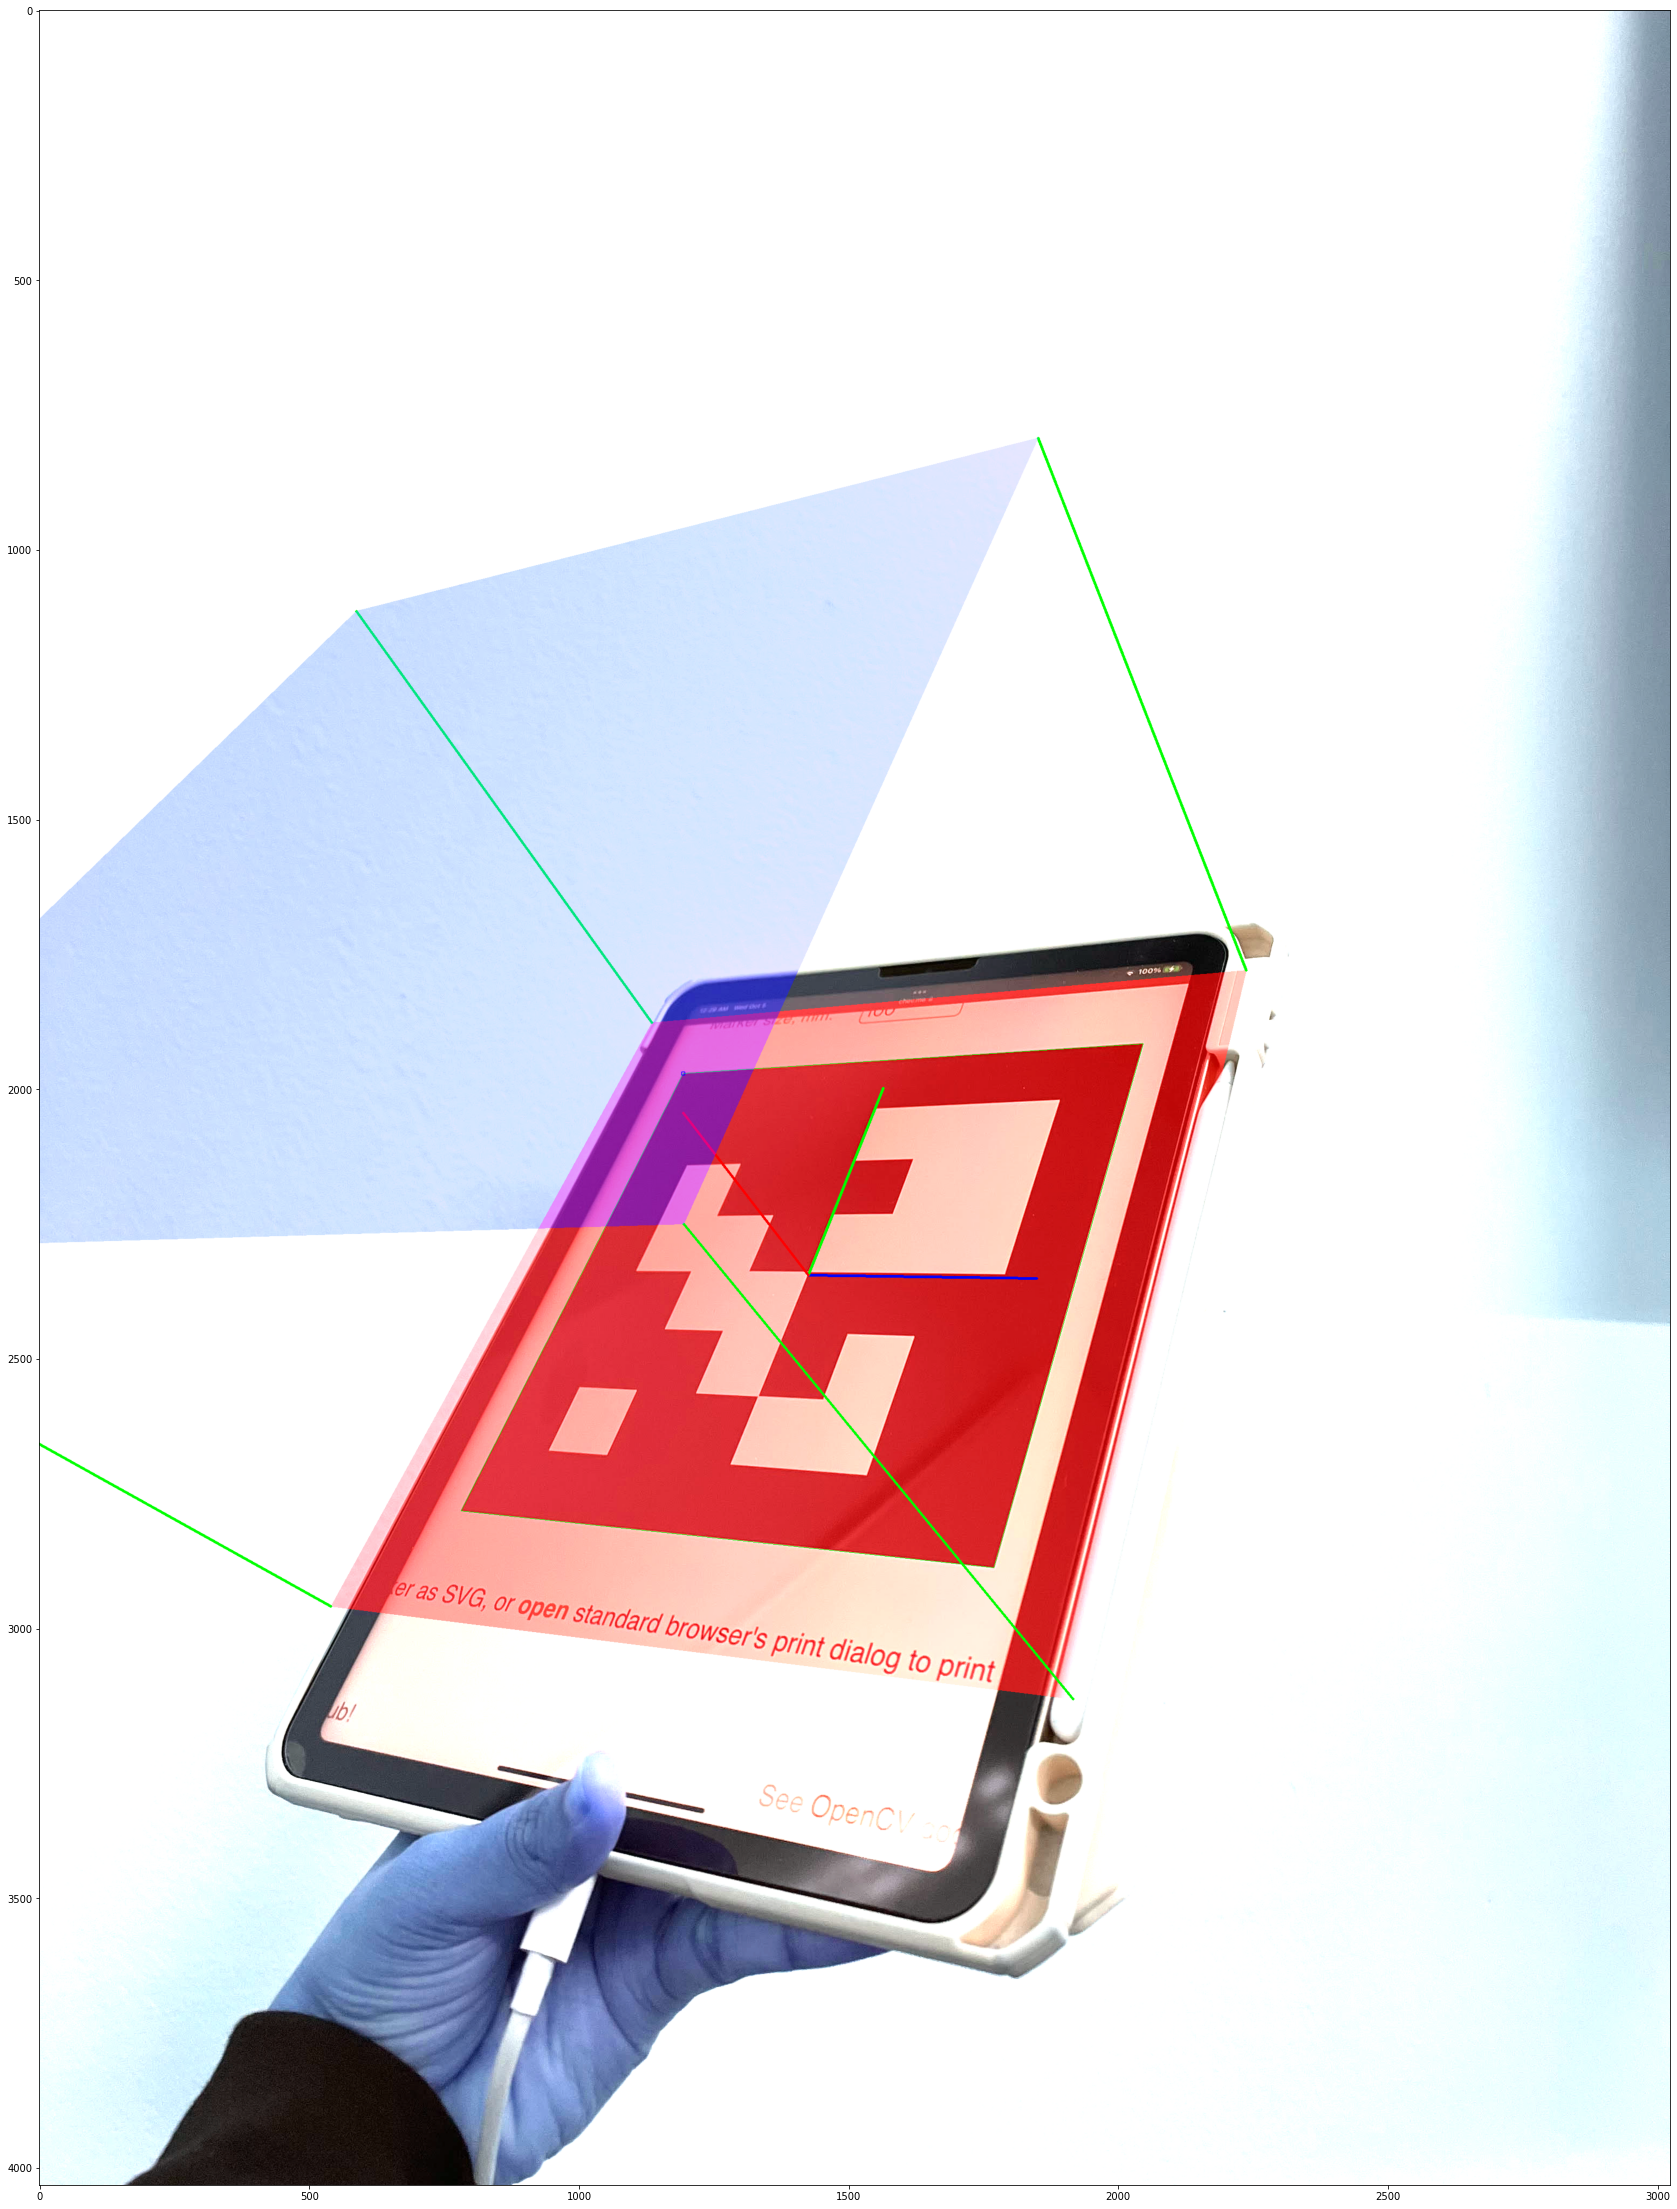

In [9]:
draw_cube(image, imgpts)